In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from arbitrage_main import arbitrage_profit

C:\Users\zdesi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
from arbitrage_main import arbitrage_profit
import arbitrage_main
import matplotlib.pyplot as plt
import poisson
from time import time
import numpy as np
ip = "147.32.83.171"

completed


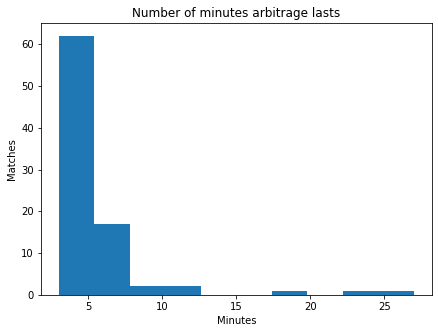

In [5]:
prof,ids=poisson.load_txt(file='profit_basic.txt')
_,counts = np.unique(ids,return_counts=True)
plt.subplots(figsize=(7,5))
plt.hist(counts*3)
plt.title("Number of minutes arbitrage lasts")
plt.xlabel("Minutes")
plt.ylabel("Matches")
plt.savefig("histogram.png")
#plt.show()

In [ ]:

profits_basic, betting_vectors_basic, matchids_profit_basic=arbitrage_profit(p=1,max_bet=1000,min_bet=0, engine=engine, res_engine=result_engine, weighted=False, uniform_weights = False,match_ids=match_ids)

In [ ]:
profits_uniform, betting_vectors_uniform, matchids_profit_uniform=arbitrage_profit(p=1,max_bet=1000, min_bet=0, engine=engine, res_engine=result_engine, weighted = True, uniform_weights = False,match_ids=match_ids)

In [ ]:
profits_lambda, betting_vectors_lambda, matchids_profit_lambda=arbitrage_profit(p=1,max_bet=1000, min_bet=0, engine=engine, res_engine=result_engine, weighted = True, lambda_weighted = True,match_ids=match_ids)

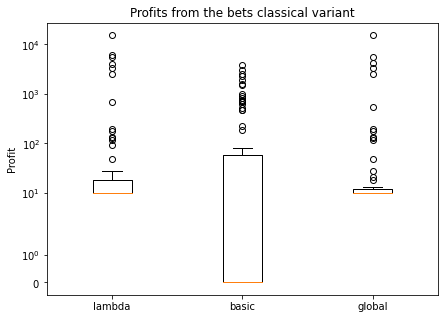

In [21]:
tmp_l=arbitrage_main.clean_results(profits_lambda,ids=matchids_profit_lambda)
tmp_u=arbitrage_main.clean_results(profits_uniform,ids=matchids_profit_uniform)
tmp_b=arbitrage_main.clean_results(profits_basic,ids=matchids_profit_basic)
plt.subplots(figsize=(7,5))
plt.boxplot([tmp_l,tmp_b,tmp_u],labels=['lambda','basic','global'])
plt.title("Profits from the bets classical variant")
plt.ylabel('Profit')
plt.yscale('symlog')
plt.savefig('classical_variant_outliers.png')
#plt.show()


4657.460543975531
4490.141170632588
21199.539212335752


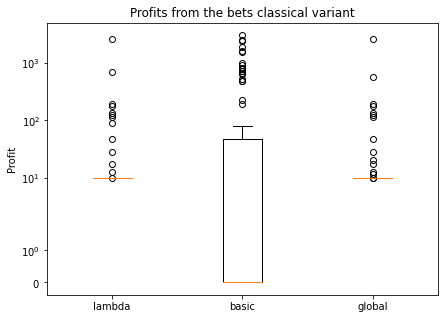

In [22]:
plt.subplots(figsize=(7,5))
tmp_l=arbitrage_main.clean_results(profits_lambda,ids=matchids_profit_lambda,threhsold=3000)
print(sum(tmp_l))
tmp_u=arbitrage_main.clean_results(profits_uniform,ids=matchids_profit_uniform,threhsold=3000)
print(sum(tmp_u))
tmp_b=arbitrage_main.clean_results(profits_basic,ids=matchids_profit_basic,threhsold=3000)
print(sum(tmp_b))
plt.boxplot([tmp_l,tmp_b,tmp_u],labels=['lambda','basic','global'])
plt.title("Profits from the bets classical variant")
plt.ylabel('Profit')
plt.yscale('symlog')
plt.savefig('classical_variant.png')
#plt.show()

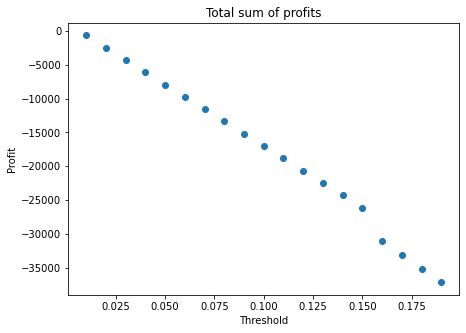

In [11]:
#k= [(i+1)*0.01 for i in range(20)]
k = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19])
base = "new_threshold/profits_threshold_{k}.txt"
res = {}
ids = {}
lenghts= []
profits={}
profits_2d = []
for t in k[::-1]:
    res[str(t)],ids[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits[str(t)] = arbitrage_main.clean_results(profits=res[str(t)],ids=ids[str(t)],threhsold=3000)
    profits_2d.append(sum(profits[str(t)]))
    #lenghts.append(len(profits[str(t)]))
plt.subplots(figsize=(7,5))
plt.scatter(y=profits_2d,x=k[::-1])
plt.title('Total sum of profits')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.savefig('Total_sum_of_profit_negative_outcome.png')
#plt.show()

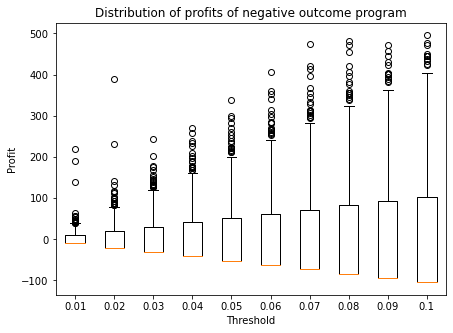

In [12]:
#k= [(i+1)*0.01 for i in range(20)]
k = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10])
base = "new_threshold/profits_threshold_{k}.txt"
res = {}
ids = {}
lenghts= []
profits={}
profits_2d = []
for t in k:
    res[str(t)],ids[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits[str(t)] = arbitrage_main.clean_results(profits=res[str(t)],ids=ids[str(t)],threhsold=500)
    profits_2d.append((profits[str(t)]))
    #lenghts.append(len(profits[str(t)]))
plt.subplots(figsize=(7,5))
plt.boxplot(profits_2d,labels=k)
plt.title('Distribution of profits of negative outcome program')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.savefig('distribution_negative_first_half.png')
#plt.show()

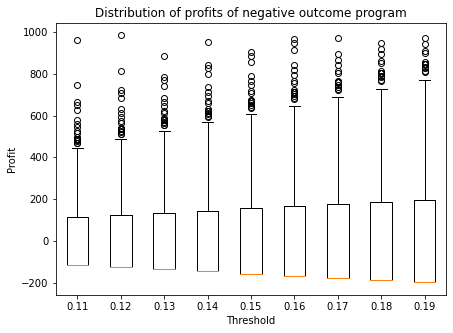

In [13]:
#k= [(i+1)*0.01 for i in range(20)]
k = np.array([0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19])
base = "new_threshold/profits_threshold_{k}.txt"
res = {}
ids = {}
lenghts= []
profits={}
profits_2d = []
for t in k :
    res[str(t)],ids[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits[str(t)] = arbitrage_main.clean_results(profits=res[str(t)],ids=ids[str(t)],threhsold=1000)
    profits_2d.append(profits[str(t)])
    #lenghts.append(len(profits[str(t)]))
plt.subplots(figsize=(7,5))
plt.boxplot(profits_2d,labels=k)
plt.title('Distribution of profits of negative outcome program')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.savefig('distribution_negative_second_half.png')

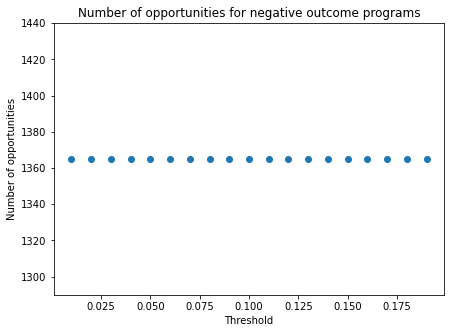

In [14]:
#k= [(i+1)*0.01 for i in range(20)]
k = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19])
base = "new_threshold/profits_threshold_{k}.txt"
res = {}
ids = {}
lenghts= []
profits={}
profits_2d = []
for t in k:
    res[str(t)],ids[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits[str(t)] = arbitrage_main.clean_results(profits=res[str(t)],ids=ids[str(t)],threhsold=500)
    profits_2d.append(1365)
    #lenghts.append(len(profits[str(t)]))
plt.subplots(figsize=(7,5))
plt.scatter(y=profits_2d,x=k)
plt.title('Number of opportunities for negative outcome programs')
plt.xlabel('Threshold')
plt.ylabel('Number of opportunities')
plt.savefig('Negative_outcome_counts.png')
#plt.show()

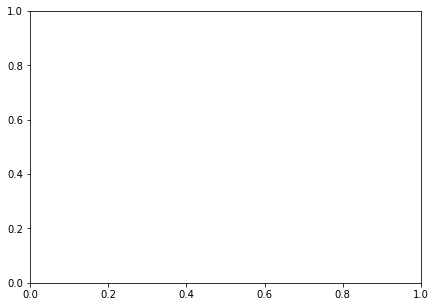

In [15]:
cut_offs = [0.75,0.8,0.85,0.9,0.95]
base = "cut_off/profit_lambda_{k}.txt"
res_cut_off = {}
ids_cut_off = {}
lengths_semi = []
profits_2d = []
for t in cut_offs:
    res_cut_off[str(t)],ids_cut_off[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits = arbitrage_main.clean_results(res_cut_off[str(t)],ids_cut_off[str(t)],threhsold=13500)
    profits_2d.append(profits)
    #print(len(profits))
    lengths_semi.append(sum(profits))
    #lengths.append(1365)
    #print("for cut_off {t}profit per bet is {p}".format(t=t,p=sum(profits)/len(profits)))
plt.subplots(figsize=(7,5))

#plt.boxplot(x=profits_2d,labels=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.scatter(y=lengths,x=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.title("Number of opportunities for negative outcome programs")
#plt.title("Sum of profits")
#plt.xlabel("p")
#plt.ylabel("Total profit")
#plt.show()
plt.savefig("p_arbitrage_sum_semi_strict.png")
#plt.show()

In [16]:
cut_offs_cut = [0.8,0.85,0.9,0.95]
base = "cut_off/profit_lambda_{k}.txt"
res_cut_off = {}
ids_cut_off = {}
lengths_strict = []
profits_2d = []
for t in cut_offs_cut:
    res_cut_off[str(t)],ids_cut_off[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits = arbitrage_main.clean_results(res_cut_off[str(t)],ids_cut_off[str(t)],threhsold=5000)
    profits_2d.append(profits)
    lengths_strict.append(sum(profits))
    #lengths.append(1365)
    #print("for cut_off {t}profit per bet is {p}".format(t=t,p=sum(profits)/len(profits)))
#plt.subplots(figsize=(7,5))
#plt.boxplot(x=profits_2d,labels=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.title("Number of opportunities for negative outcome programs")
#plt.title("Sum of profits")
#plt.xlabel("p")
#plt.ylabel("Total profit")
#plt.show()
plt.savefig("p_arbitrage_sum_strict.png")
#plt.show()

<Figure size 432x288 with 0 Axes>

(<Figure size 504x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ad810dd9d0>)

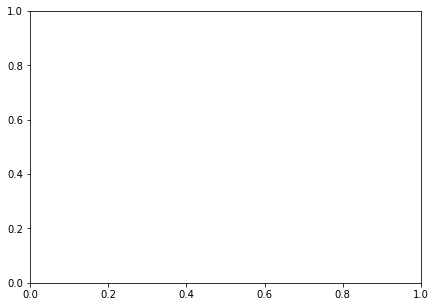

In [17]:
cut_offs = [0.75,0.8,0.85,0.9,0.95]
base = "cut_off/profit_lambda_{k}.txt"
res_cut_off = {}
ids_cut_off = {}
lengths_outliers = []
profits_2d = []
for t in cut_offs:
    res_cut_off[str(t)],ids_cut_off[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits = arbitrage_main.clean_results(res_cut_off[str(t)],ids_cut_off[str(t)])
    profits_2d.append(profits)
    #print(len(profits))
    lengths_outliers.append(sum(profits))
    #print("for cut_off {t}profit per bet is {p}".format(t=t,p=sum(profits)/len(profits)))
plt.subplots(figsize=(7,5))

#plt.boxplot(x=profits_2d,labels=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.scatter(y=lengths,x=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.title("Number of opportunities for negative outcome programs")
#plt.title("Sum of profits")
#plt.xlabel("p")
#plt.ylabel("Total profit")
#plt.show()
#plt.savefig("p_arbitrage_sum_with_outliers.png")
#plt.show()

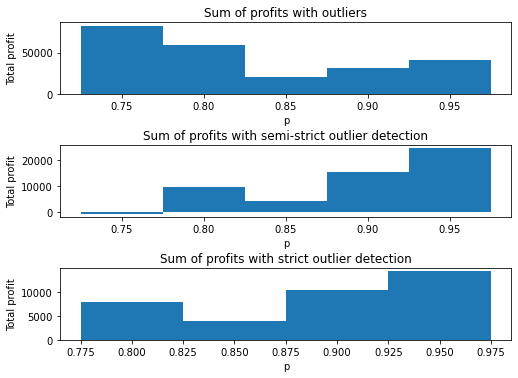

In [18]:
fig,axs = plt.subplots(3,1,figsize=(7,5))
fig.tight_layout(h_pad=3)
axs[0].bar(height=lengths_outliers,x=cut_offs,width=0.05)
axs[0].set_xlabel('p')
axs[0].set_ylabel('Total profit')
axs[0].set_title("Sum of profits with outliers")
axs[1].bar(height=lengths_semi,x=cut_offs,width=0.05)
axs[1].set_xlabel('p')
axs[1].set_ylabel('Total profit')
axs[1].set_title("Sum of profits with semi-strict outlier detection")
axs[2].bar(height=lengths_strict,x=cut_offs_cut,width=0.05)
axs[2].set_xlabel('p')
axs[2].set_ylabel('Total profit')
axs[2].set_title("Sum of profits with strict outlier detection")
fig.savefig('compressed.png',bbox_inches='tight')

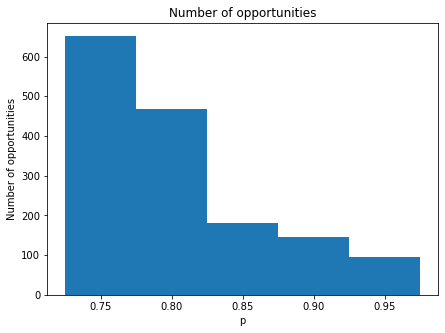

In [23]:
cut_offs = [0.75,0.8,0.85,0.9,0.95]
base = "cut_off/profit_lambda_{k}.txt"
res_cut_off = {}
ids_cut_off = {}
lengths = []
profits_2d = []
for t in cut_offs:
    res_cut_off[str(t)],ids_cut_off[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits = arbitrage_main.clean_results(res_cut_off[str(t)],ids_cut_off[str(t)])
    profits_2d.append(profits)
    #print(len(profits))
    lengths.append(len(profits))
    #print("for cut_off {t}profit per bet is {p}".format(t=t,p=sum(profits)/len(profits)))
plt.subplots(figsize=(7,5))

#plt.boxplot(x=profits_2d,labels=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.scatter(y=lengths,x=cut_offs)
plt.bar(height=lengths,x=cut_offs,width=0.05)
plt.title("Number of opportunities")
plt.xlabel("p")
plt.ylabel("Number of opportunities")
#plt.show()
plt.savefig("p_arbitrage_counts.png")
#plt.show()

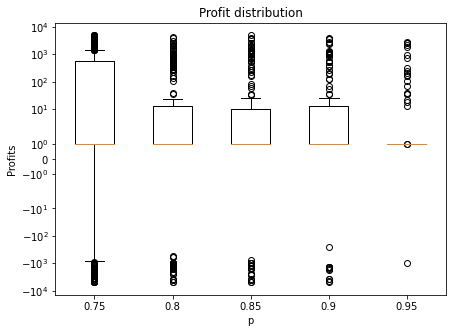

In [20]:
cut_offs = [0.75,0.8,0.85,0.9,0.95]
base = "cut_off/profit_lambda_{k}.txt"
res_cut_off = {}
ids_cut_off = {}
lengths = []
profits_2d = []
for t in cut_offs:
    res_cut_off[str(t)],ids_cut_off[str(t)]=(poisson.load_txt(file=base.format(k=t)))
    profits = arbitrage_main.clean_results(res_cut_off[str(t)],ids_cut_off[str(t)],threhsold=5000)
    profits_2d.append(profits)
    #print(len(profits))
    lengths.append(len(profits))
    #print("for cut_off {t}profit per bet is {p}".format(t=t,p=sum(profits)/len(profits)))
plt.subplots(figsize=(7,5))

plt.boxplot(x=profits_2d,labels=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.scatter(y=lengths,x=cut_offs)
#plt.bar(height=lengths,x=cut_offs,width=0.05)
#plt.title("Number of opportunities")
plt.title("Profit distribution")
plt.xlabel("p")
plt.ylabel("Profits")
plt.yscale('symlog')
#plt.show()
plt.savefig("p_arbitrage_distribution.png")
#plt.show()